## **libraries**


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob 
import cv2
import tensorflow as tf
import keras
import matplotlib.image as mpimg
from skimage import color
from skimage.color import rgb2gray
from scipy.ndimage.filters import median_filter

##  **Connection With The DataSet**

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
trainpath='/content/drive/MyDrive/data_augmentation.zip (Unzipped Files)/data_augmentation/train/'
testpath = '/content/drive/MyDrive/data_augmentation.zip (Unzipped Files)/data_augmentation/validation/'
predictpath = '/content/drive/MyDrive/DataSet/Predict/*.PNG'
#trainpath='/content/drive/MyDrive/DataSet/Train/'
#testpath = '/content/drive/MyDrive/DataSet/Test'
#predictpath = '/content/drive/MyDrive/DataSet/Predict/*.PNG'

## **Printing Sime Information About The DataSet**

In [5]:
for folder in  os.listdir(trainpath): 
    files = glob.glob(pathname= str( trainpath+folder+ '/*.PNG'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 888 in folder melanoma
For training data , found 1697 in folder not_melanoma


In [6]:
for folder in  os.listdir(testpath): 
    files = glob.glob(pathname= str( testpath +folder+ '/*.PNG'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 28 in folder melanoma
For training data , found 54 in folder not_melanoma


In [7]:
files = glob.glob(pathname= str(predictpath))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 6


In [ ]:
size = []
for folder in  os.listdir(trainpath): 
    files = glob.glob(pathname= str(  trainpath +folder+ '/*.PNG'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(141, 191, 3)     17
(260, 418, 3)     17
(305, 495, 3)     16
(192, 286, 3)     15
(92, 147, 3)       9
                  ..
(161, 232, 3)      6
(310, 440, 3)      6
(187, 190, 3)      6
(277, 369, 3)      6
(666, 1029, 3)     5
Length: 320, dtype: int64

In [8]:
size = []
for folder in  os.listdir(testpath): 
    files = glob.glob(pathname= str( testpath+folder+ '/*.PNG'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(233, 285, 4)    2
(197, 221, 4)    1
(158, 218, 4)    1
(165, 179, 4)    1
(169, 228, 4)    1
                ..
(398, 462, 4)    1
(333, 495, 4)    1
(228, 270, 4)    1
(109, 212, 4)    1
(203, 343, 4)    1
Length: 81, dtype: int64

In [9]:
size = []
files = glob.glob(pathname= str(predictpath))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(134, 186, 4)    1
(228, 270, 4)    1
(223, 263, 4)    1
(117, 230, 4)    1
(212, 213, 4)    1
(210, 331, 4)    1
dtype: int64

##  **Coding Intialization**

In [118]:
code = {'melanoma':0 ,'not_melanoma':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [119]:
s = 100
def maskReflection(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # threshold grayscale image to extract glare
        mask = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)[1]
        # use mask with input to do inpainting
        result = cv2.inpaint(img, mask, 25, cv2.INPAINT_TELEA) 
        # convert BGR to RGB
        result_RGB = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
        return result_RGB


In [120]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath): 
    files = glob.glob(pathname= str(trainpath +folder+ '/*.PNG'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        maskex = maskReflection(image_array)
        median = median_filter(maskex,3)
        X_train.append(list(median))
        y_train.append(code[folder])

In [91]:
print(f'we have {len(X_train)} items in X_test')

we have 2585 items in X_test


##**End**

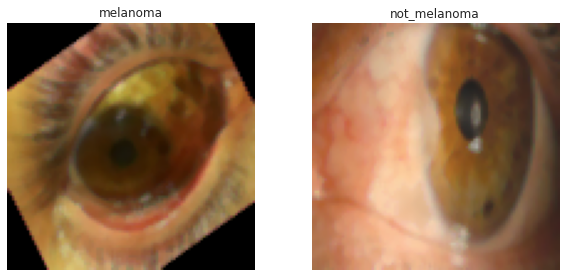

In [92]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_train),2))) : 
    plt.subplot(2,2,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [121]:
X_test = []
y_test = []
for folder in  os.listdir(testpath): 
    files = glob.glob(pathname= str( testpath +folder+ '/*.PNG'))
    for file in files: 
        image = cv2.imread(file)
        #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_array = cv2.resize(image , (s,s))
        maskex = maskReflection(image_array)
        median = median_filter(maskex,3)
        X_test.append(list(median))
        y_test.append(code[folder])

In [94]:
print(f'we have {len(X_test)} items in X_test')

we have 82 items in X_test


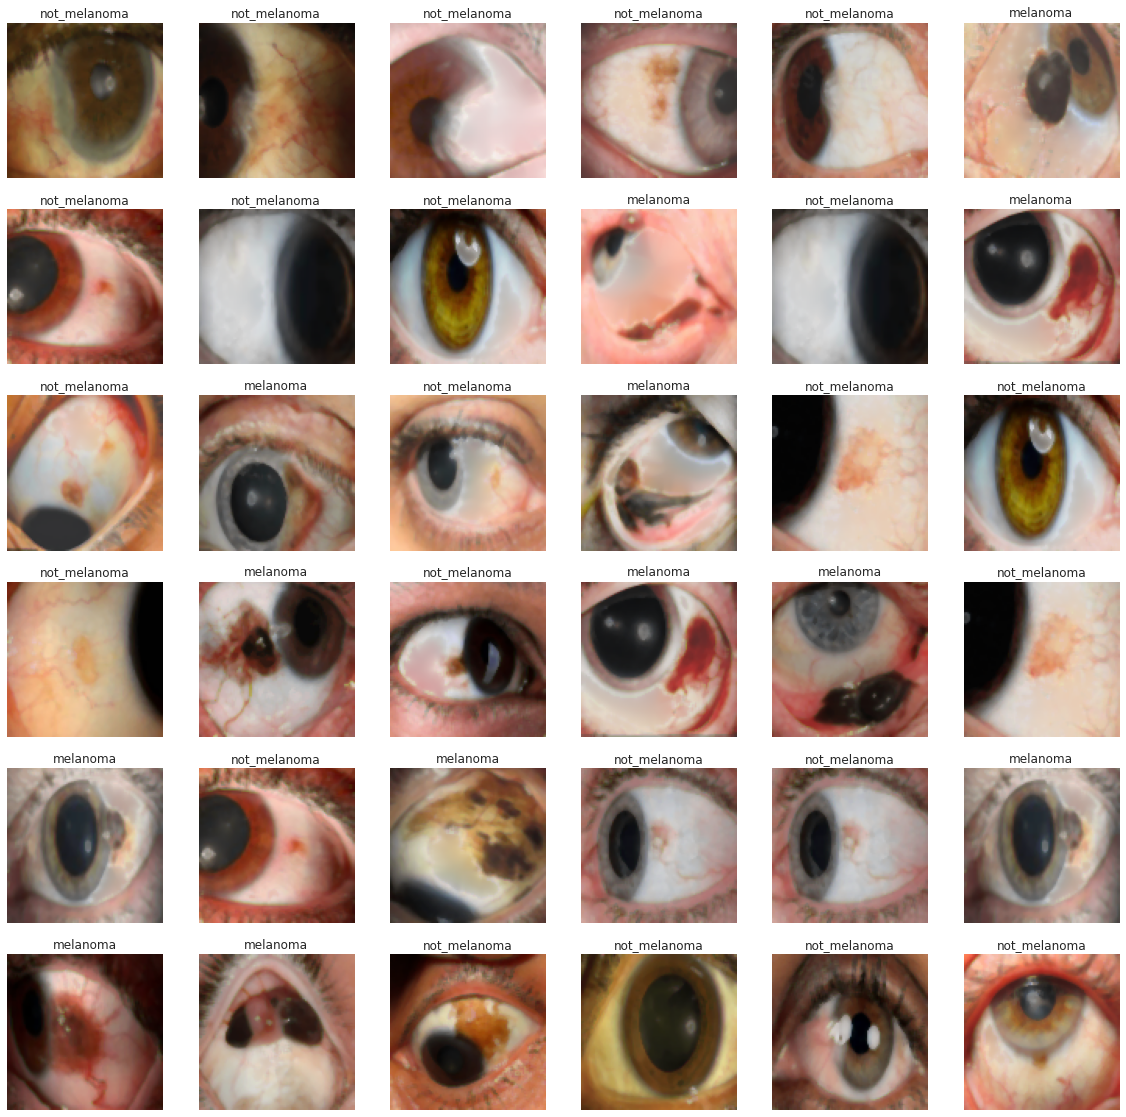

In [95]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i],'gray')    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [123]:
X_pred = []
files = glob.glob(pathname= str(predictpath))
for file in files: 
    image = cv2.imread(file)
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_array = cv2.resize(image , (s,s))
    maskex = maskReflection(image_array)
    median = median_filter(maskex,3)
    X_pred.append(list(median))  

In [97]:
print(f'we have {len(X_pred)} items in X_pred')

we have 6 items in X_pred


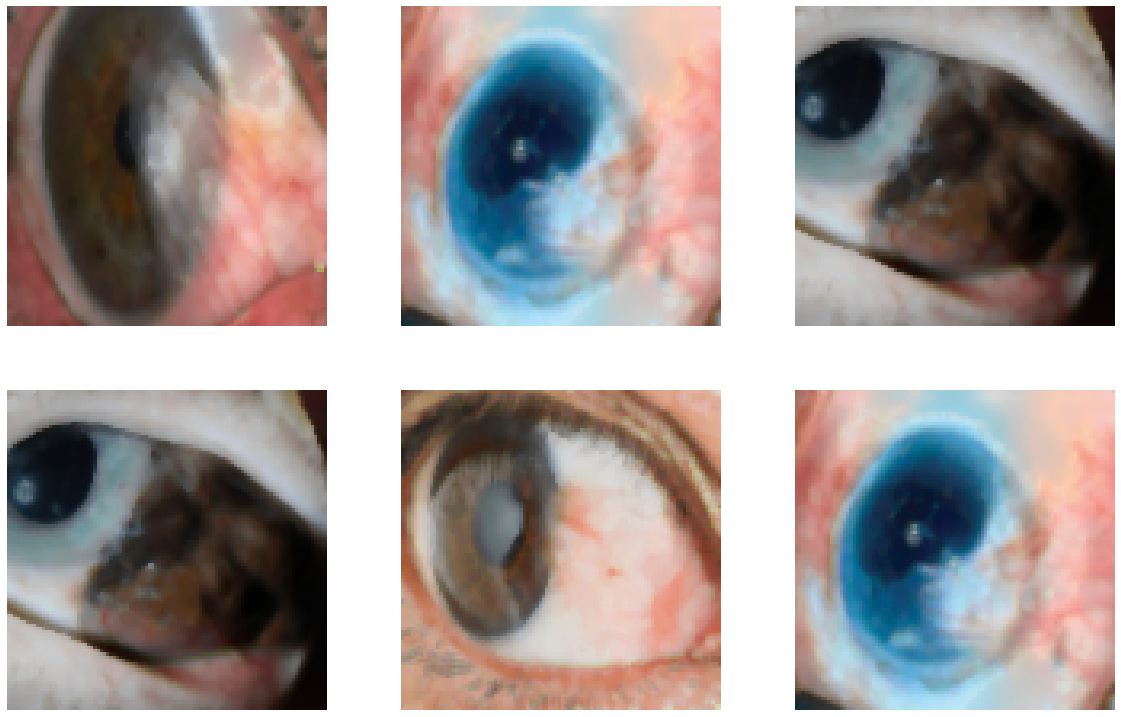

In [98]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),6))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(X_pred[i],'gray')    
    plt.axis('off')

In [124]:
X_train = np.array(X_train)
#X_train = X_train.reshape(X_train.shape + (1,))
X_test = np.array(X_test)
#X_test = X_test.reshape(X_test.shape + (1,))
X_pred_array = np.array(X_pred)
#X_pred_array = X_pred_array.reshape(X_pred_array.shape + (1,))
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(y_train)

X_train shape  is (2585, 100, 100, 3)
X_test shape  is (82, 100, 100, 3)
X_pred shape  is (6, 100, 100, 3)
y_train shape  is (2585,)
y_test shape  is (82,)
[0 0 0 ... 1 1 1]


In [125]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),    
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.2) ,            
        keras.layers.Dense(2,activation='softmax') ,    
        ])

In [101]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=5,verbose=1,factor=0.1)

In [126]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [103]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 98, 128)       3584      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 96, 96, 64)        73792     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (Non

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

In [127]:
batch_size=32
epochs=30
History = KerasModel.fit(X_train,y_train , batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,y_test ),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
80/80 [==============================] - 4s 45ms/step - loss: 4.5982 - accuracy: 0.5769 - val_loss: 0.6003 - val_accuracy: 0.7073
Epoch 2/30
80/80 [==============================] - 3s 40ms/step - loss: 0.6292 - accuracy: 0.6642 - val_loss: 0.5497 - val_accuracy: 0.6829
Epoch 3/30
80/80 [==============================] - 3s 40ms/step - loss: 0.5454 - accuracy: 0.7381 - val_loss: 0.4860 - val_accuracy: 0.8171
Epoch 4/30
80/80 [==============================] - 3s 40ms/step - loss: 0.4763 - accuracy: 0.7808 - val_loss: 0.4501 - val_accuracy: 0.8293
Epoch 5/30
80/80 [==============================] - 3s 40ms/step - loss: 0.4342 - accuracy: 0.8147 - val_loss: 0.4113 - val_accuracy: 0.8537
Epoch 6/30
80/80 [==============================] - 3s 40ms/step - loss: 0.3674 - accuracy: 0.8467 - val_loss: 0.3974 - val_accuracy: 0.8780
Epoch 7/30
80/80 [==============================] - 3s 40ms/step - loss: 0.2959 - accuracy: 0.8842 - val_loss: 0.3794 - val_accuracy: 0.8537
Epoch 8/30
80

In [128]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

3/3 [==============================] - 0s 9ms/step - loss: 0.9833 - accuracy: 0.8902
Test Loss is 0.9832767248153687
Test Accuracy is 0.8902438879013062


In [ ]:
#ValLoss, Val_Accuracy = KerasModel.evaluate(X_train, y_train)

#print('Test Loss is {}'.format(ValLoss))
#print('Test Accuracy is {}'.format(Val_Accuracy ))

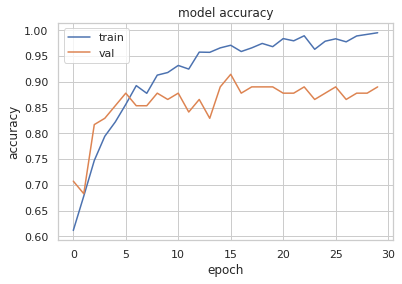

In [129]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (82, 2)


In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (6, 2)


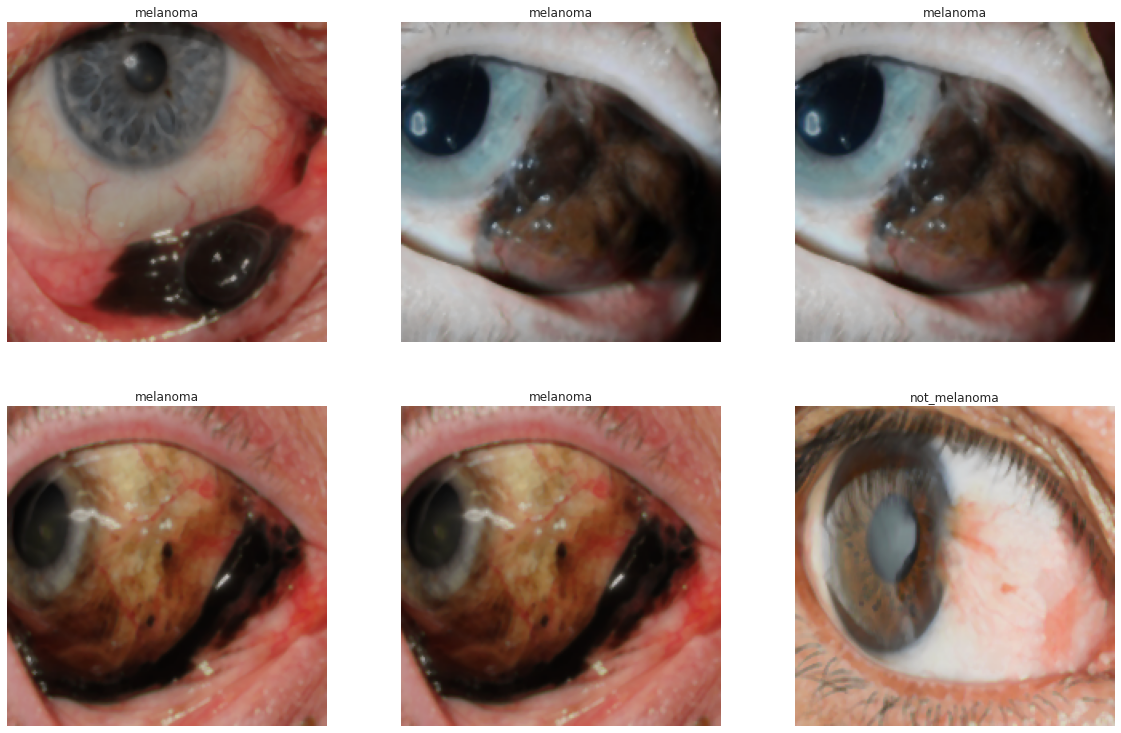

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),6))) : 
    plt.subplot(3,3,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))